In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [ ]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    raise NotImplementedError

# 2 Grid Search

Fill in the function `grid_search()` below:

In [1]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    raise NotImplementedError
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.012 seconds


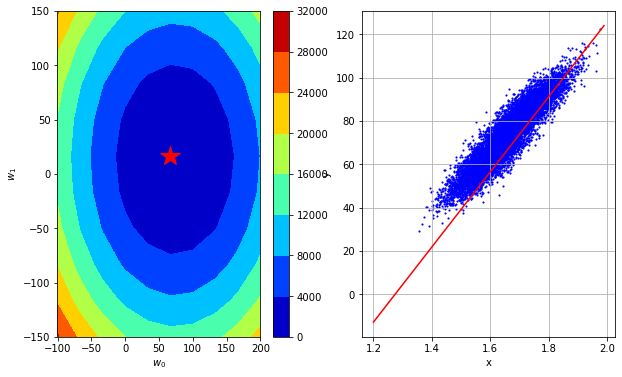

In [7]:
from grid_search import generate_w, get_best_parameters, grid_search, Loss
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1, Loss.MSE)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [ ]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    raise NotImplementedError

Please fill in the functions `gradient_descent` below:

In [ ]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        raise NotImplementedError
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [5]:
from gradient_descent import *
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=265.3024621089606, w0=51.30574540147361, w1=9.435798704492274
Gradient Descent(1/49): loss=37.87837955044127, w0=66.69746902191571, w1=12.266538315840002
Gradient Descent(2/49): loss=17.41021212017447, w0=71.31498610804834, w1=13.11576019924433
Gradient Descent(3/49): loss=15.568077051450459, w0=72.70024123388814, w1=13.37052676426563
Gradient Descent(4/49): loss=15.402284895265295, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/49): loss=15.38736360120863, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=15.386020684743531, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/49): loss=15.385899822261674, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.385888944638307, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385887965652202, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=15.385887877543455, w0=73.29379216412119, w1=13.4

In [6]:
# Time Visualization
from plots import gradient_descent_visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [ ]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    raise NotImplementedError


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    raise NotImplementedError
    return losses, ws

In [7]:
from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 32

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=2301.7128426961076, w0=7.112835119373159, w1=-0.4025657885170946
Stochastic Gradient Descent(1/49): loss=1912.5498324362204, w0=13.342313388160271, w1=-0.6671074809902701
Stochastic Gradient Descent(2/49): loss=1536.680212212763, w0=19.48368046865648, w1=1.3534370464049772
Stochastic Gradient Descent(3/49): loss=1234.1212056456059, w0=24.97757529840882, w1=3.330757968554461
Stochastic Gradient Descent(4/49): loss=995.1363347659372, w0=29.952900746697193, w1=4.4765590800534385
Stochastic Gradient Descent(5/49): loss=820.6556684621285, w0=34.08788677109745, w1=4.910794028820213
Stochastic Gradient Descent(6/49): loss=674.7144983110264, w0=37.94972054901772, w1=5.146367096653175
Stochastic Gradient Descent(7/49): loss=548.0291386274324, w0=41.490744448541776, w1=6.1418381505844195
Stochastic Gradient Descent(8/49): loss=446.2752402581996, w0=44.67772148157677, w1=6.9305313756771625
Stochastic Gradient Descent(9/49): loss=363.9601496920591, w0=47.584

In [8]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


In [9]:
# initialize data
import datetime
from helpers import *

height_outlier, weight_outlier, gender_outlier = load_data(sub_sample=True, add_outlier=True)
x_outlier, mean_x_outlier, std_x_outlier = standardize(height_outlier)
y_outlier, tx_outlier = build_model_data(x_outlier, weight_outlier)

In [10]:
y_outlier.shape, tx_outlier.shape

((202,), (202, 2))

In [11]:
# 尝试输入outlier的数据集

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses_outlier, gradient_ws_outlier = gradient_descent(y_outlier, tx_outlier, w_initial, max_iters, gamma, Loss.MSE)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("(Sub dataset with outlier) Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=318.282124701595, w0=51.847464098448484, w1=7.724426406192441
Gradient Descent(1/49): loss=88.6423556165126, w0=67.401703327983, w1=10.041754328050121
Gradient Descent(2/49): loss=67.97477639885521, w0=72.06797509684336, w1=10.736952704607413
Gradient Descent(3/49): loss=66.11469426926604, w0=73.46785662750146, w1=10.945512217574594
Gradient Descent(4/49): loss=65.94728687760302, w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/49): loss=65.93222021235334, w0=74.01381042445813, w1=11.026850427631796
Gradient Descent(6/49): loss=65.93086421248087, w0=74.05160722578589, w1=11.03248153448191
Gradient Descent(7/49): loss=65.93074217249236, w0=74.06294626618423, w1=11.034170866536943
Gradient Descent(8/49): loss=65.93073118889338, w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(9/49): loss=65.93073020036948, w0=74.06736849193958, w1=11.034829706038407
Gradient Descent(10/49): loss=65.93073011140233, w0=74.06767464603033, w1=11.034875318

In [12]:
# Time Visualization for Outlier case
from plots import gradient_descent_visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses_outlier, gradient_ws_outlier, grid_losses, grid_w0, grid_w1, mean_x_outlier, std_x_outlier, height_outlier, weight_outlier, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [13]:
def compute_loss(y, tx, w):
    # ***************************************************
    # 使用MAE计算loss
    # ***************************************************
    N = len(y)
    e = y - tx.dot(w)
    return np.mean(np.abs(e))

In [14]:
def compute_subgradient(y, tx, w):
    # ***************************************************
    # 计算MAE的subgradient
    # ***************************************************
    N = len(y)
    e = y - tx.dot(w)
    return (-1 / N) * np.dot(tx.T, np.sign(e))

In [15]:
# 迭代计算数据
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = [compute_loss(y, tx, initial_w)]
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        subgradient = compute_subgradient(y, tx, w)
        
        # *****************s**********************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * subgradient
        loss = compute_loss(y, tx, w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("(MAE) Subgradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [5]:
# 尝试执行数据集
from gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 2

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma, Loss.MAE)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("(MAE) Subgradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=71.29392200210518, w0=2.0, w1=-1.7053025658242406e-15
Gradient Descent(1/49): loss=69.29392200210518, w0=4.0, w1=-3.410605131648481e-15
Gradient Descent(2/49): loss=67.29392200210518, w0=6.0, w1=-5.115907697472722e-15
Gradient Descent(3/49): loss=65.29392200210518, w0=8.0, w1=-6.821210263296962e-15
Gradient Descent(4/49): loss=63.29392200210518, w0=10.0, w1=-8.526512829121203e-15
Gradient Descent(5/49): loss=61.293922002105184, w0=12.0, w1=-1.0231815394945444e-14
Gradient Descent(6/49): loss=59.293922002105184, w0=14.0, w1=-1.1937117960769684e-14
Gradient Descent(7/49): loss=57.293922002105184, w0=16.0, w1=-1.3642420526593925e-14
Gradient Descent(8/49): loss=55.293922002105184, w0=18.0, w1=-1.5347723092418165e-14
Gradient Descent(9/49): loss=53.29392200210517, w0=20.0, w1=-1.7053025658242407e-14
Gradient Descent(10/49): loss=51.29392200210517, w0=22.0, w1=-1.875832822406665e-14
Gradient Descent(11/49): loss=49.29392200210517, w0=24.0, w1=-2.046363078989089e

In [8]:
# 绘制图像
from plots import gradient_descent_visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>